In [68]:
%%capture
!pip install pandas
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('results.csv')

In [5]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [6]:
df.describe()

,home_score,away_score
count,47370.000000,47370.000000
mean,1.759954,1.183154
std,1.775366,1.401821
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [7]:
df.isnull().sum()

date           0
home_team      5
away_team      5
home_score    11
away_score    11
tournament     0
city           0
country        0
neutral        0
dtype: int64

In [8]:
df['home_team'].str.contains('India')

0        False
1        False
2        False
3        False
4        False
         ...  
47376      NaN
47377      NaN
47378      NaN
47379      NaN
47380      NaN
Name: home_team, Length: 47381, dtype: object

In [9]:
df[(df['home_team'].str.contains('India')) | (df['away_team'].str.contains('India'))]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
2338,1938-09-03,Australia,India,5.0,3.0,Friendly,Sydney,Australia,False
2344,1938-09-10,Australia,India,4.0,4.0,Friendly,Brisbane,Australia,False
2345,1938-09-17,Australia,India,1.0,4.0,Friendly,Newcastle,Australia,False
2350,1938-09-24,Australia,India,5.0,4.0,Friendly,Sydney,Australia,False
2354,1938-10-01,Australia,India,3.0,1.0,Friendly,Melbourne,Australia,False
...,...,...,...,...,...,...,...,...,...
46872,2024-01-23,Syria,India,1.0,0.0,AFC Asian Cup,Al Khor,Qatar,True
46943,2024-03-21,Afghanistan,India,0.0,0.0,FIFA World Cup qualification,Abha,Saudi Arabia,True
47039,2024-03-26,India,Afghanistan,1.0,2.0,FIFA World Cup qualification,Guwahati,India,False
47137,2024-06-06,India,Kuwait,0.0,0.0,FIFA World Cup qualification,Kolkota,India,False


In [10]:
home_goals = df[df['home_team'] == 'India']['home_score'].sum()
away_goals = df[df['away_team'] == 'India']['away_score'].sum()
home_matches = df['home_team'].eq('India').sum()
away_matches = df['away_team'].eq('India').sum()
print(home_goals, away_goals)
print(home_matches, away_matches)
print(home_goals/home_matches, away_goals/away_matches)

438.0 283.0
302 217
1.4503311258278146 1.304147465437788


In [11]:
# TO DO
# CREATE DECADE WISE CHARTS FOR INDIA'S AVERAGE GOALS SCORED + WIN%

In [27]:
def determine_winner(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['home_score'] < row['away_score']:
        return row['away_team']
    else:
        return 'Draw'

# apply() is like a for loop, applying the function for each row
df['winner'] = df.apply(determine_winner, axis=1)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,decade,winner
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1872,1870,Draw
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1873,1870,England
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1874,1870,Scotland
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,1875,1870,Draw
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1876,1870,Scotland


In [28]:
india_home = df[df['home_team'] == 'India']
india_away = df[df['away_team'] == 'India']

In [29]:
df['year'] = pd.to_datetime(df['date']).dt.year
df['decade'] = (df['year'] // 10) * 10
# india_home['year'] = pd.to_datetime(india_home['date']).dt.year
# india_home['decade'] = (india_home['year'] // 10) * 10

# india_away['year'] = pd.to_datetime(india_away['date']).dt.year
# india_away['decade'] = (india_away['year'] // 10) * 10

In [30]:
home_goals_per_decade = india_home.groupby('decade')['home_score'].sum()
away_goals_per_decade = india_away.groupby('decade')['away_score'].sum()
print(home_goals_per_decade)
print(away_goals_per_decade)
# india_home['year'] = pd.to_datetime(india_home['date']).dt.year
# india_home['decade'] = (india_home['year'] // 10) * 10

# india_away['year'] = pd.to_datetime(india_away['date']).dt.year
# india_away['decade'] = (india_away['year'] // 10) * 10

decade
1940      0.0
1950     23.0
1960     44.0
1970     51.0
1980     48.0
1990     58.0
2000     71.0
2010    117.0
2020     26.0
Name: home_score, dtype: float64
decade
1930    16.0
1940     3.0
1950    45.0
1960    42.0
1970    44.0
1980    16.0
1990    31.0
2000    32.0
2010    39.0
2020    15.0
Name: away_score, dtype: float64


In [31]:
all_decades = sorted(set(home_goals_per_decade.index).union(set(away_goals_per_decade.index)))
home_goals_per_decade = home_goals_per_decade.reindex(all_decades, fill_value=0)
away_goals_per_decade = away_goals_per_decade.reindex(all_decades, fill_value=0)


decades = home_goals_per_decade.index
bar_width = 0.5
r1 = np.arange(len(decades))
r2 = np.array([x + bar_width for x in r1])

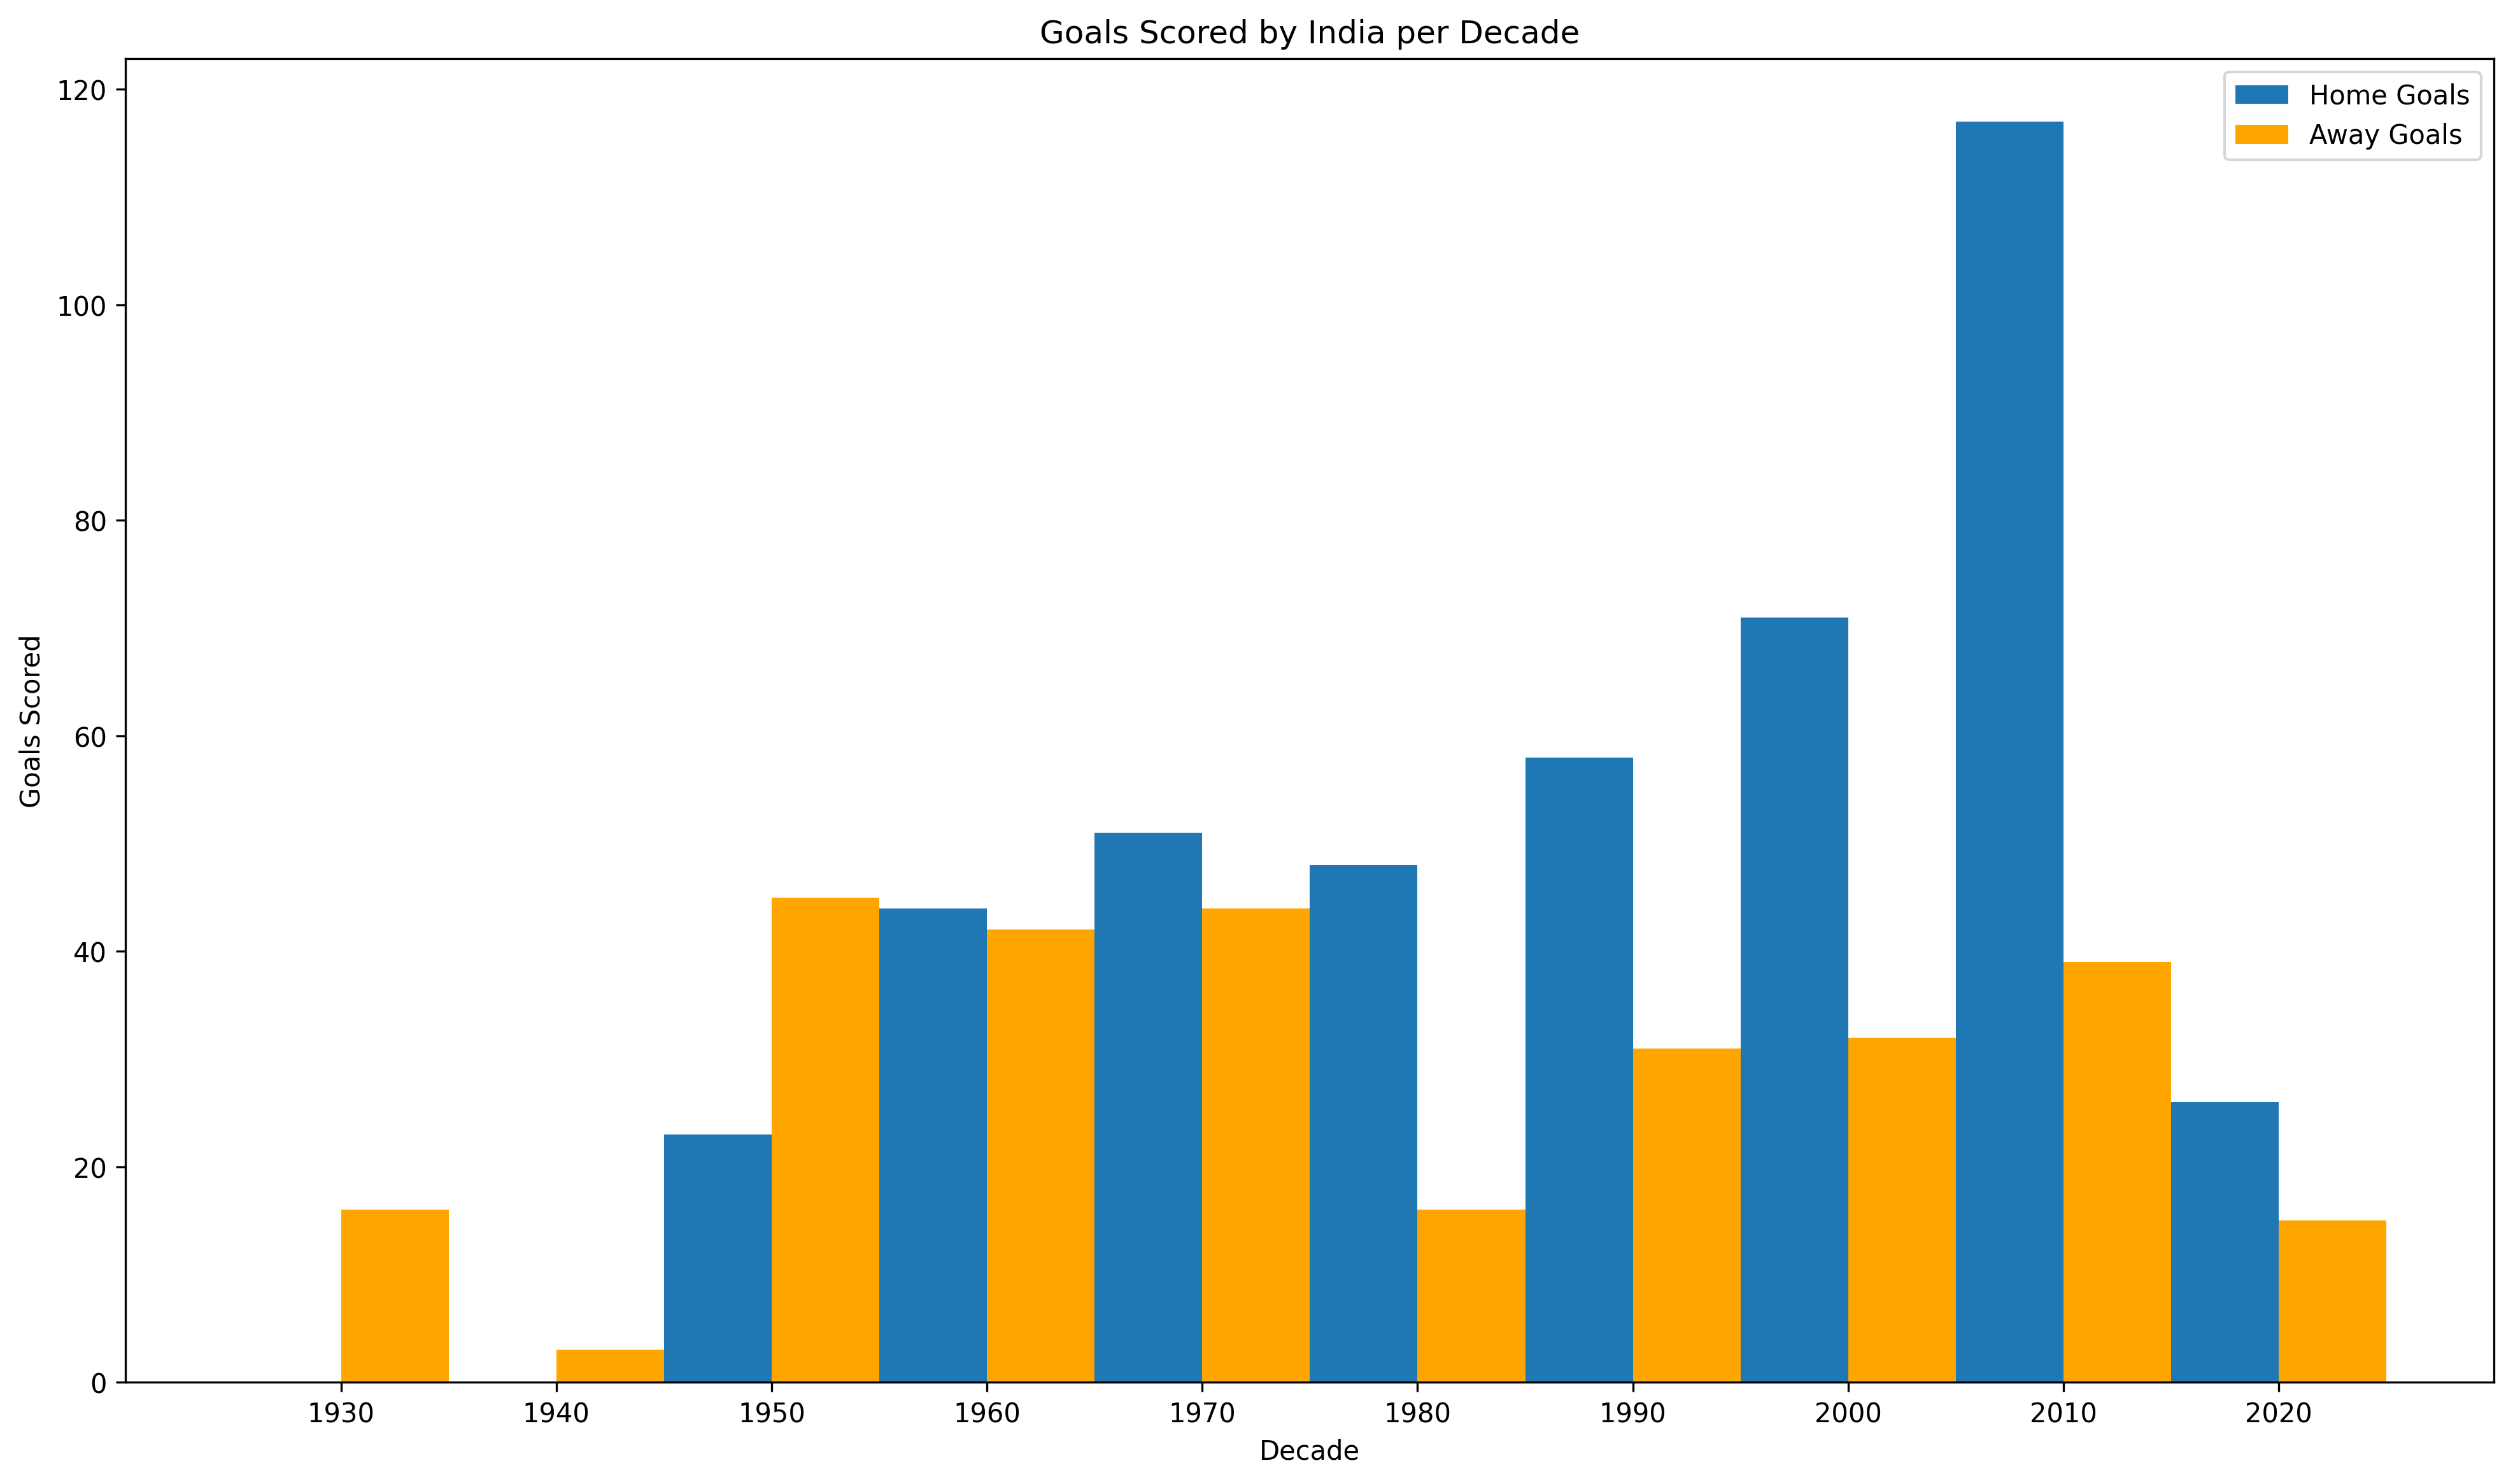

In [32]:
plt.figure(figsize=(16, 9), dpi=300)
plt.bar(r1, home_goals_per_decade.values, bar_width, label='Home Goals')
plt.bar(r1+0.5, away_goals_per_decade.values, bar_width, label='Away Goals', color='orange')
plt.xlabel('Decade')
plt.ylabel('Goals Scored')
plt.title('Goals Scored by India per Decade')
plt.xticks([r + 0.25 for r in r1], decades)
plt.legend()
plt.show()

In [33]:
avghome_goals_per_decade = india_home.groupby('decade')['home_score'].sum()/india_home.groupby('decade')['home_team'].count()
avgaway_goals_per_decade = india_away.groupby('decade')['away_score'].sum()/india_away.groupby('decade')['away_team'].count()
print(avghome_goals_per_decade)
print(avgaway_goals_per_decade)

decade
1940    0.000000
1950    1.277778
1960    1.294118
1970    1.416667
1980    1.297297
1990    1.208333
2000    1.577778
2010    1.857143
2020    1.300000
dtype: float64
decade
1930    3.200000
1940    3.000000
1950    3.000000
1960    1.680000
1970    1.571429
1980    0.500000
1990    1.550000
2000    1.000000
2010    0.951220
2020    0.833333
dtype: float64


In [34]:
all_decades = sorted(set(avghome_goals_per_decade.index).union(set(avgaway_goals_per_decade.index)))
avghome_goals_per_decade = avghome_goals_per_decade.reindex(all_decades, fill_value=0)
avgaway_goals_per_decade = avgaway_goals_per_decade.reindex(all_decades, fill_value=0)

decades = avghome_goals_per_decade.index
bar_width = 0.5
rr1 = np.arange(len(decades))
rr2 = np.array([x + bar_width for x in rr1])

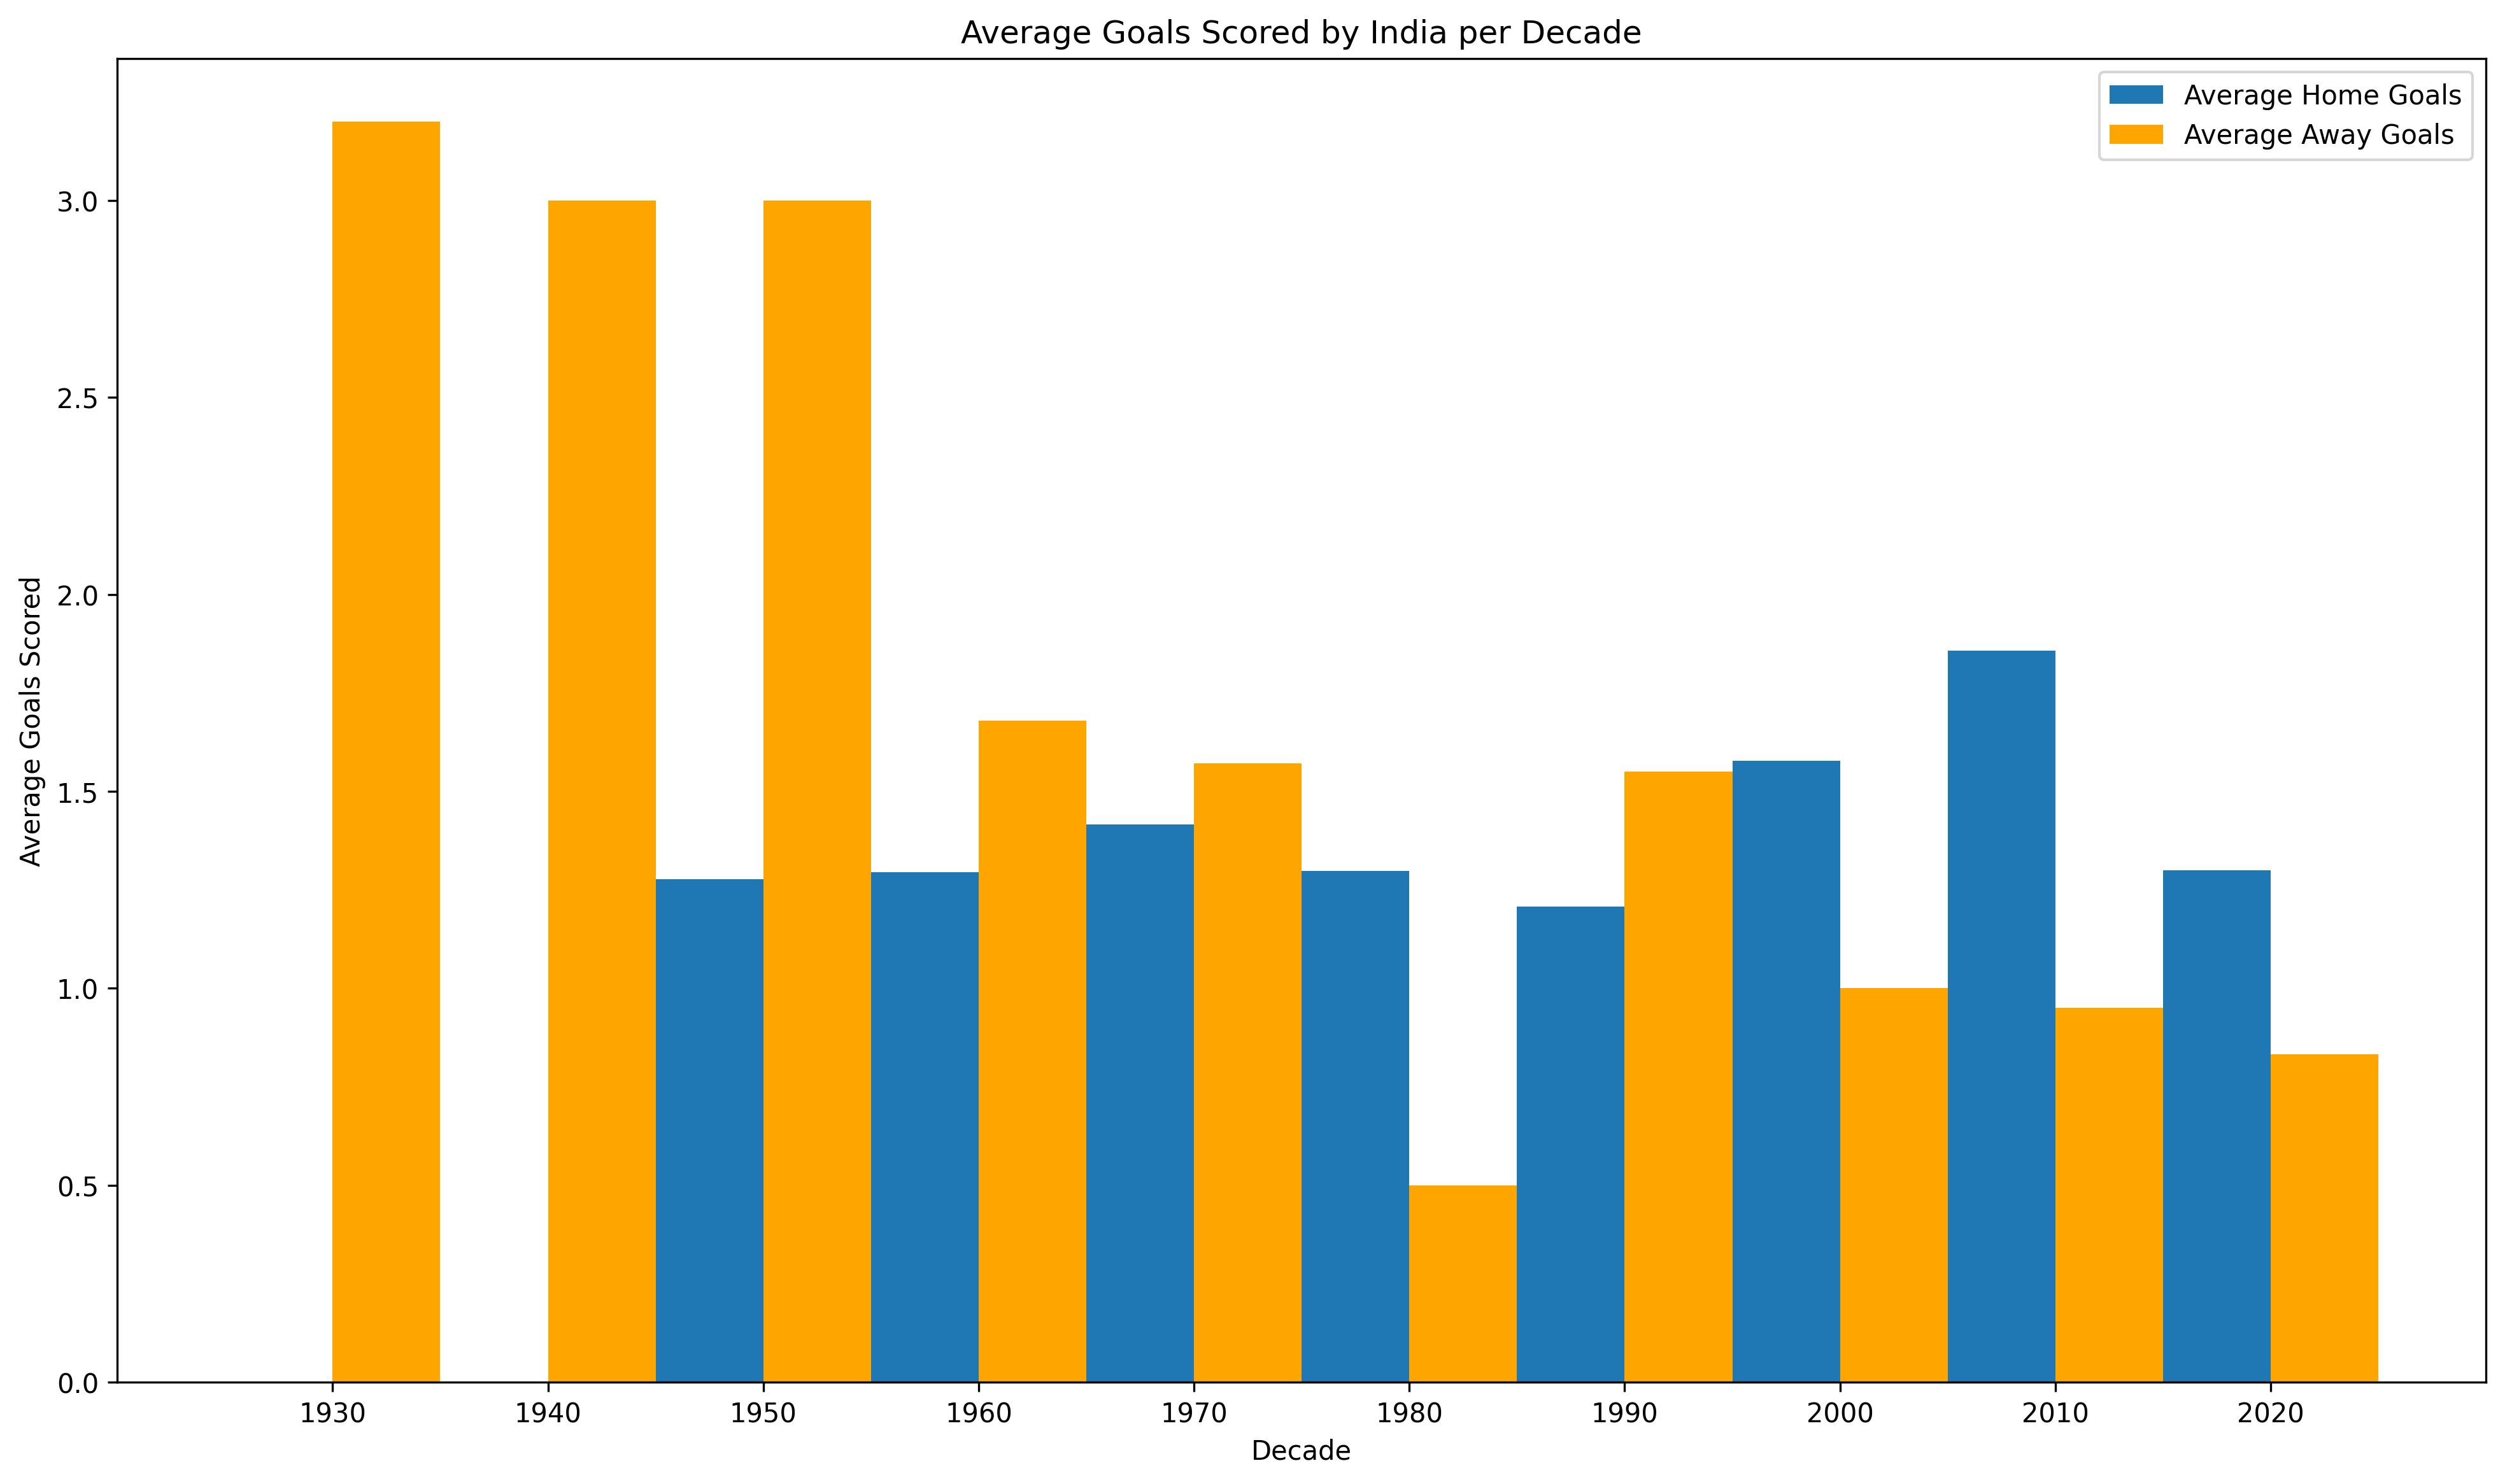

In [35]:
plt.figure(figsize=(16, 9), dpi=300)
plt.bar(rr1, avghome_goals_per_decade.values, bar_width, label='Average Home Goals')
plt.bar(r1+0.5, avgaway_goals_per_decade.values, bar_width, label='Average Away Goals', color='orange')
plt.xlabel('Decade')
plt.ylabel('Average Goals Scored')
plt.title('Average Goals Scored by India per Decade')
plt.xticks([r + 0.25 for r in r1], decades)
plt.legend()
plt.show()

In [53]:
india_home_wins = india_home[india_home['winner'] == 'India']
india_away_wins = india_away[india_away['winner'] == 'India']
homewin_percentage_per_decade = (india_home_wins.groupby('decade')['winner'].count()/india_home.groupby('decade')['home_team'].count())*100
awaywin_percentage_per_decade = (india_away_wins.groupby('decade')['winner'].count()/india_away.groupby('decade')['away_team'].count())*100
print(india_home.groupby('decade')['home_team'].count())
print(india_away.groupby('decade')['away_team'].count())
print(india_home_wins.groupby('decade')['winner'].count())
print(india_away_wins.groupby('decade')['winner'].count())

decade
1940     1
1950    18
1960    34
1970    36
1980    37
1990    48
2000    45
2010    63
2020    20
Name: home_team, dtype: int64
decade
1930     5
1940     1
1950    15
1960    25
1970    28
1980    32
1990    20
2000    32
2010    41
2020    18
Name: away_team, dtype: int64
decade
1950     7
1960    14
1970    12
1980    15
1990    17
2000    22
2010    31
2020     8
Name: winner, dtype: int64
decade
1930     1
1940     1
1950    12
1960    11
1970     8
1980     2
1990     4
2000     9
2010    10
2020     5
Name: winner, dtype: int64


In [54]:
print(homewin_percentage_per_decade)
print(awaywin_percentage_per_decade)

decade
1940          NaN
1950    38.888889
1960    41.176471
1970    33.333333
1980    40.540541
1990    35.416667
2000    48.888889
2010    49.206349
2020    40.000000
dtype: float64
decade
1930     20.000000
1940    100.000000
1950     80.000000
1960     44.000000
1970     28.571429
1980      6.250000
1990     20.000000
2000     28.125000
2010     24.390244
2020     27.777778
dtype: float64


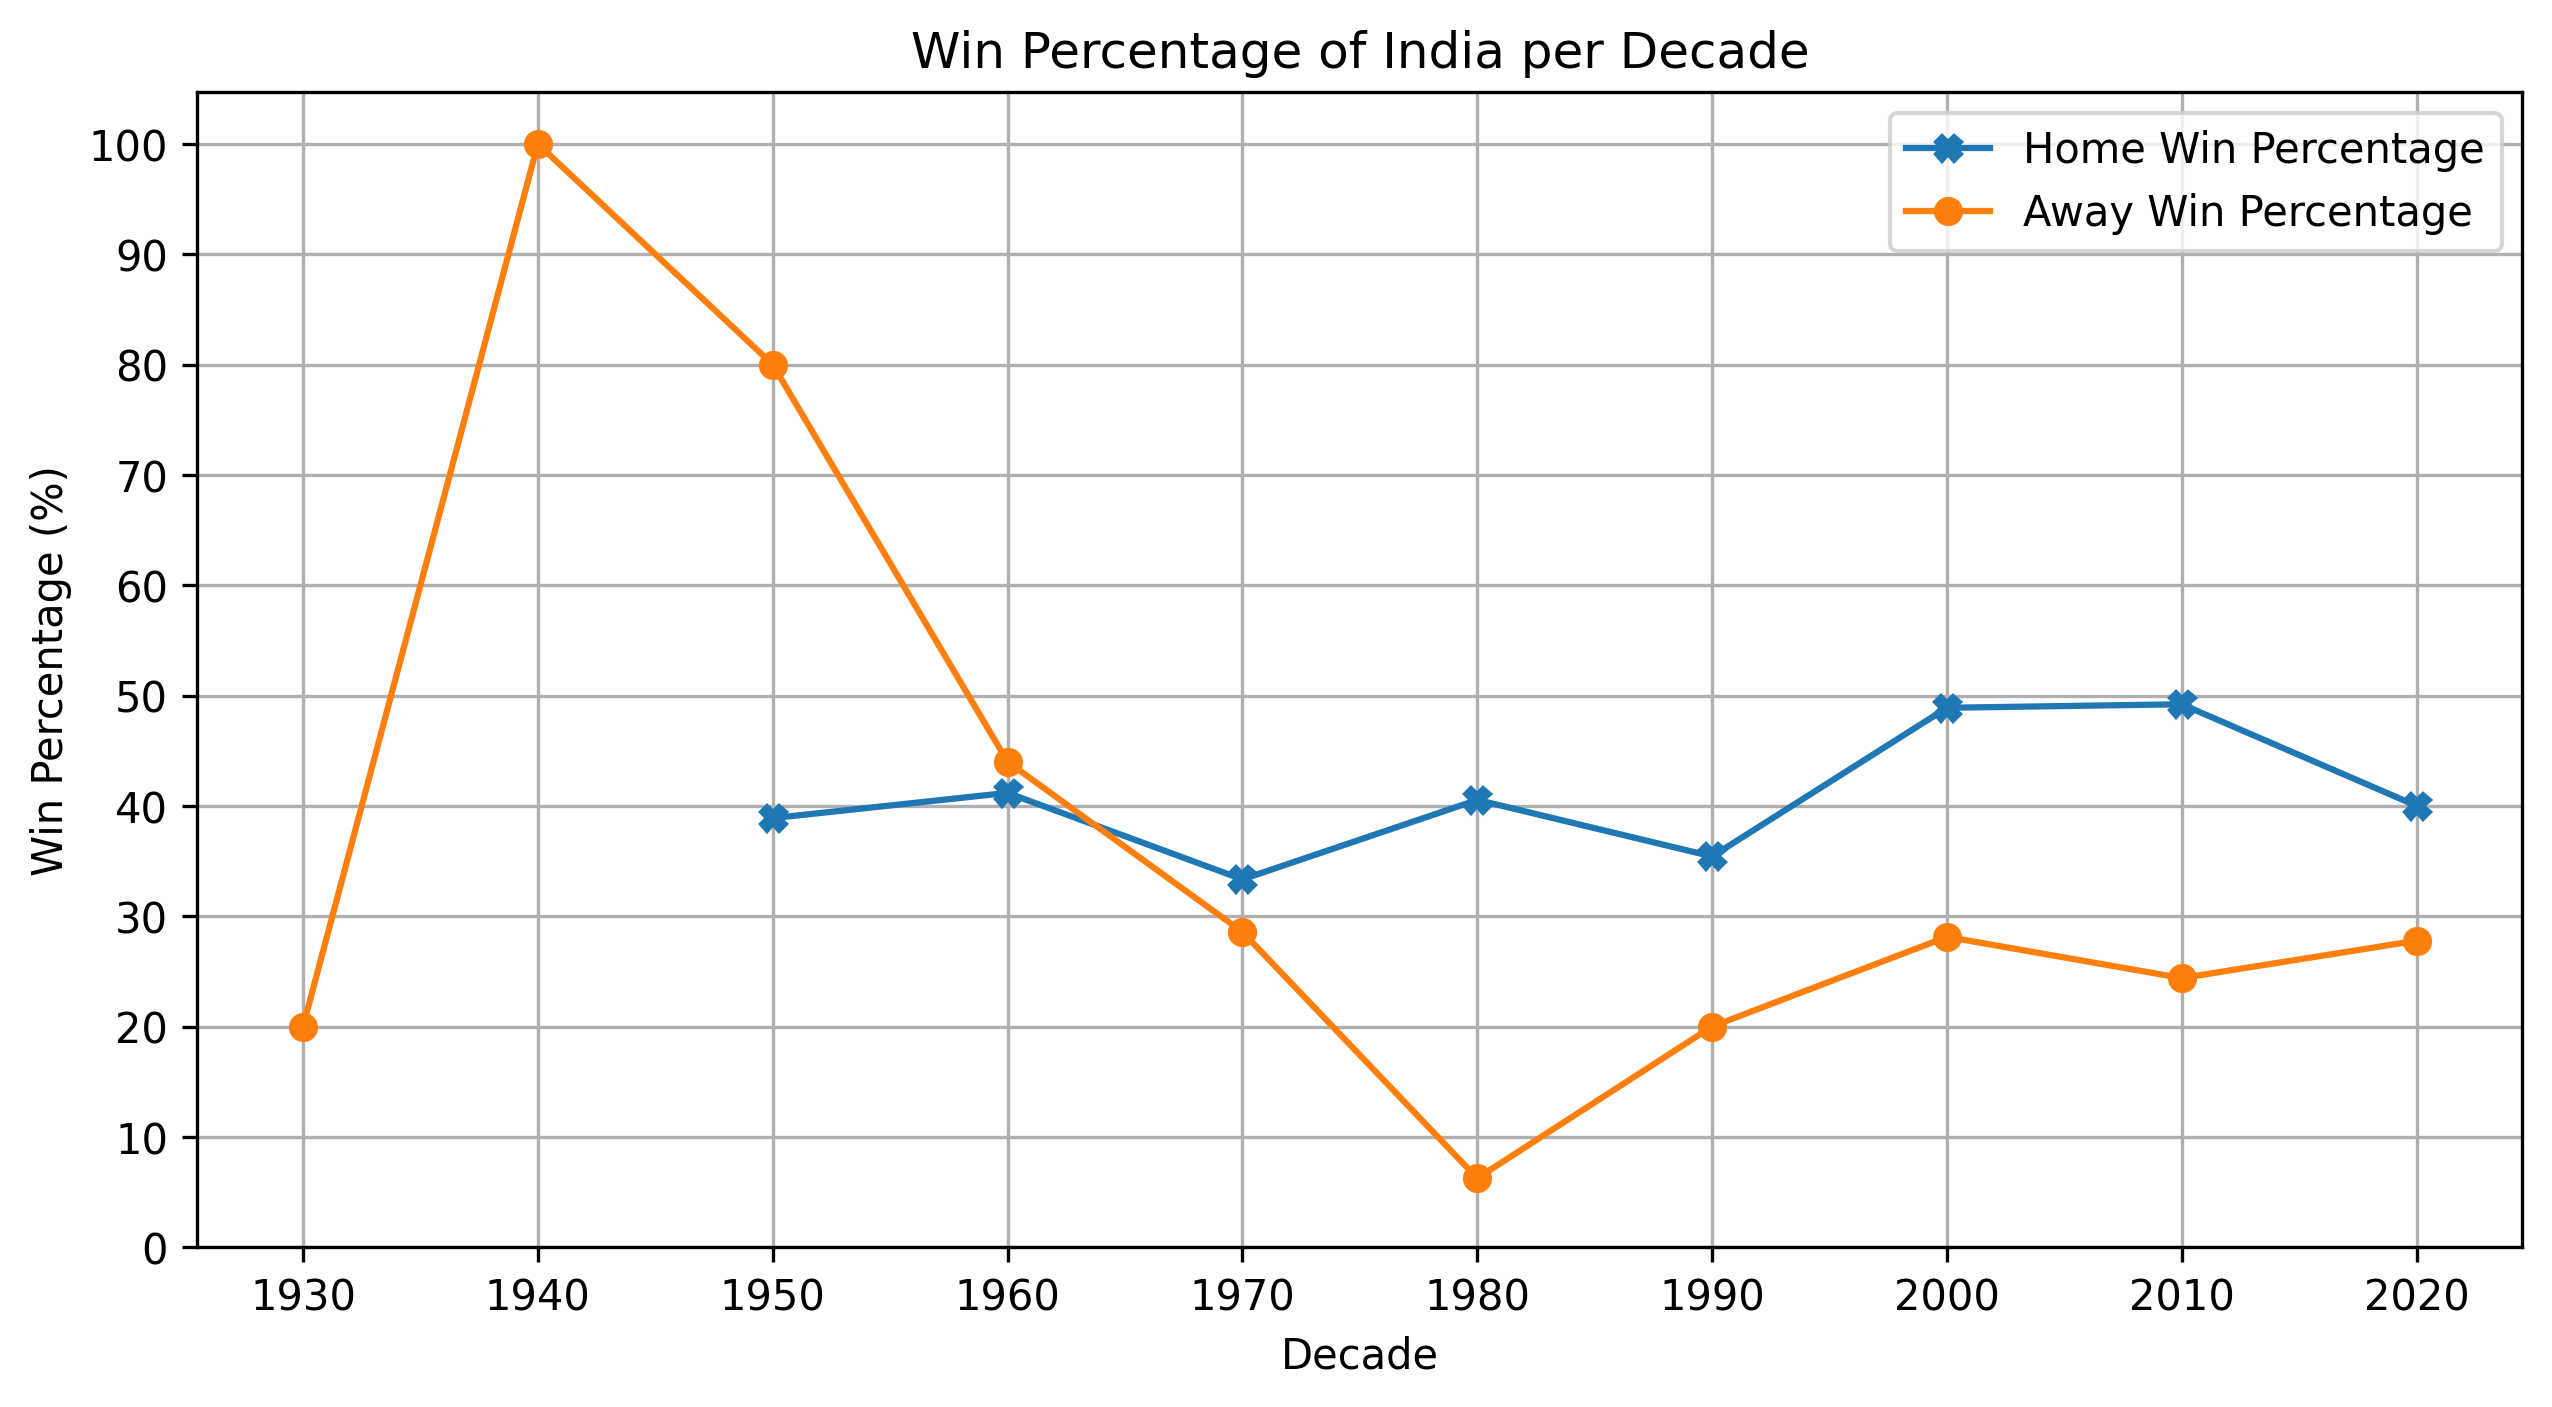

In [65]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(homewin_percentage_per_decade.index, homewin_percentage_per_decade.values, marker='X', label='Home Win Percentage')
plt.plot(awaywin_percentage_per_decade.index, awaywin_percentage_per_decade.values, marker='o', label='Away Win Percentage')
plt.xlabel('Decade')
plt.ylabel('Win Percentage (%)')
plt.xticks(decades)
plt.yticks([i for i in range(0,110,10)])
plt.title('Win Percentage of India per Decade')
plt.legend()
plt.grid(True)
plt.show()